# Example
The below is an example of how to use the various reaction representations provided in this github repo (SLATM_r, SLATM_d, BoB_r, BoB_rp, SOAP_d, etc, as well as our own B2R2) for the SN2 dataset.

The four datasets (SN2-20, GDB7-20-TS, Proparg-21-TS, Hydroform-22-TS) referenced in the paper are available with equivalent functions.

For your own datasets, see the other example notebook.

In [1]:
import numpy as np

In [2]:
from src.reaction_reps import QML, B2R2, DScribe
from src.learning import opt_hyperparams, learning_curve

In [3]:
import matplotlib.pyplot as plt

In [4]:
b2r2 = B2R2()
b2r2.get_sn2_data()

In [6]:
b2r2_l = b2r2.get_b2r2_l(Rcut=6)

In [7]:
energies = b2r2.energies

In [8]:
qml = QML()
qml.get_sn2_data()

In [9]:
slatm_2_r, slatm_2_p, slatm_2_d = qml.get_SLATM_twobody()

In [10]:
slatm_r, slatm_p, slatm_d = qml.get_SLATM()

In [11]:
cm_r, cm_p, cm_rp = qml.get_CM()

In [12]:
bob_r, bob_p, bob_rp = qml.get_BoB()

In [13]:
fchl_r, fchl_p, fchl_d = qml.get_FCHL19()

In [14]:
ds = DScribe()
ds.get_sn2_data()
soap_r, soap_p, soap_d = ds.get_SOAP()

In [13]:
# find hyperparams in SI (or use opt_hyperparams function)

In [16]:
train_sizes, mae_slatm_2_d, std_slatm_2_d = learning_curve(slatm_2_d, energies, CV=10, sigma=100, l2reg=1e-10)

CV iteration 0
CV iteration 1
CV iteration 2
CV iteration 3
CV iteration 4
CV iteration 5
CV iteration 6
CV iteration 7
CV iteration 8
CV iteration 9


In [17]:
train_sizes, mae_slatm_d, std_slatm_d = learning_curve(slatm_d, energies, CV=10, sigma=100, l2reg=1e-10)

CV iteration 0
CV iteration 1
CV iteration 2
CV iteration 3
CV iteration 4
CV iteration 5
CV iteration 6
CV iteration 7
CV iteration 8
CV iteration 9


In [18]:
train_sizes, mae_soap_d, std_soap_d = learning_curve(soap_d, energies, CV=10, sigma=1, l2reg=1e-4)

CV iteration 0
CV iteration 1
CV iteration 2
CV iteration 3
CV iteration 4
CV iteration 5
CV iteration 6
CV iteration 7
CV iteration 8
CV iteration 9


In [19]:
train_sizes, mae_fchl_d, std_fchl_d = learning_curve(fchl_d, energies, CV=10, sigma=100, l2reg=1e-10)

CV iteration 0
CV iteration 1
CV iteration 2
CV iteration 3
CV iteration 4
CV iteration 5
CV iteration 6
CV iteration 7
CV iteration 8
CV iteration 9


In [20]:
train_sizes, mae_bob_rp, std_bob_rp = learning_curve(bob_rp, energies, CV=10, sigma=1000, l2reg=1e-10)

CV iteration 0
CV iteration 1
CV iteration 2
CV iteration 3
CV iteration 4
CV iteration 5
CV iteration 6
CV iteration 7
CV iteration 8
CV iteration 9


In [21]:
train_sizes, mae_cm_rp, std_cm_rp = learning_curve(cm_rp, energies, CV=10, sigma=100, l2reg=1e-6)

CV iteration 0
CV iteration 1
CV iteration 2
CV iteration 3
CV iteration 4
CV iteration 5
CV iteration 6
CV iteration 7
CV iteration 8
CV iteration 9


In [22]:
train_sizes, mae_b2r2_l, std_b2r2_l = learning_curve(b2r2_l, energies, CV=10, sigma=1e4, l2reg=1e-10)

CV iteration 0
CV iteration 1
CV iteration 2
CV iteration 3
CV iteration 4
CV iteration 5
CV iteration 6
CV iteration 7
CV iteration 8
CV iteration 9


In [23]:
def polyfit(train_sizes, maes):
    m, c = np.polyfit(np.log(train_sizes), np.log(maes), 1)
    polyfit = np.exp(m * np.log(train_sizes) + c)
    return polyfit

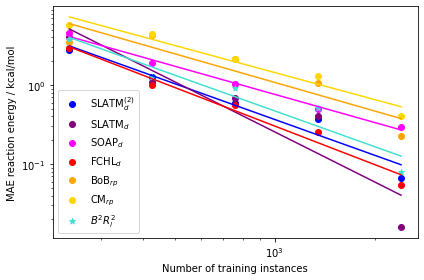

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.set_xscale('log')
ax.set_yscale('log')

ax.scatter(train_sizes, mae_slatm_2_d, color='blue', label='SLATM$_d^{(2)}$')
ax.plot(train_sizes, polyfit(train_sizes, mae_slatm_2_d), color='blue')

ax.scatter(train_sizes, mae_slatm_d, color='purple', label='SLATM$_d$')
ax.plot(train_sizes, polyfit(train_sizes, mae_slatm_d), color='purple')

ax.scatter(train_sizes, mae_soap_d, color='magenta', label='SOAP$_d$')
ax.plot(train_sizes, polyfit(train_sizes, mae_soap_d), color='magenta')

ax.scatter(train_sizes, mae_fchl_d, color='red', label='FCHL$_d$')
ax.plot(train_sizes, polyfit(train_sizes, mae_fchl_d), color='red')

ax.scatter(train_sizes, mae_bob_rp, color='orange', label='BoB$_{rp}$')
ax.plot(train_sizes, polyfit(train_sizes, mae_bob_rp), color='orange')

ax.scatter(train_sizes, mae_cm_rp, color='gold', label='CM$_{rp}$')
ax.plot(train_sizes, polyfit(train_sizes, mae_cm_rp), color='gold')

ax.scatter(train_sizes, mae_b2r2_l, color='turquoise', marker='*', label='$B^2R^2_l$')
ax.plot(train_sizes, polyfit(train_sizes, mae_b2r2_l), color='turquoise')

ax.set_xlabel("Number of training instances")
ax.set_ylabel("MAE reaction energy / kcal/mol")
plt.legend()
plt.tight_layout()
plt.show()